In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
import pandas as pd
df=pd.read_csv('food_review.csv')

In [ ]:
df.shape

(40500, 3)

In [ ]:
df.head()

,Unnamed: 0,Text,Score
0,0,I bought these from a large chain pet store. a...,1
1,1,"This soup is incredibly good! But honestly, I...",5
2,2,Our family loves these tasty and healthy sesam...,5
3,3,The local auto shop offers this free to it cus...,4
4,4,I brought 2 bottles. One I carry in my pocket...,5


In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.head()

,Text,Score
0,I bought these from a large chain pet store. a...,1
1,"This soup is incredibly good! But honestly, I...",5
2,Our family loves these tasty and healthy sesam...,5
3,The local auto shop offers this free to it cus...,4
4,I brought 2 bottles. One I carry in my pocket...,5


In [ ]:
df.Score.value_counts()

4    8117
5    8106
3    8103
2    8095
1    8079
Name: Score, dtype: int64

In [ ]:
# Import Basic libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense , GRU , LSTM , SimpleRNN , Embedding , Dropout
from tensorflow.keras.models import Sequential

In [ ]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

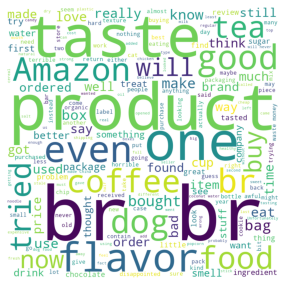

In [ ]:
wc=WordCloud(width=800 , height=800 , background_color='white' , min_font_size=10)
wc.generate(''.join(df[df['Score']==1]['Text']))
plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

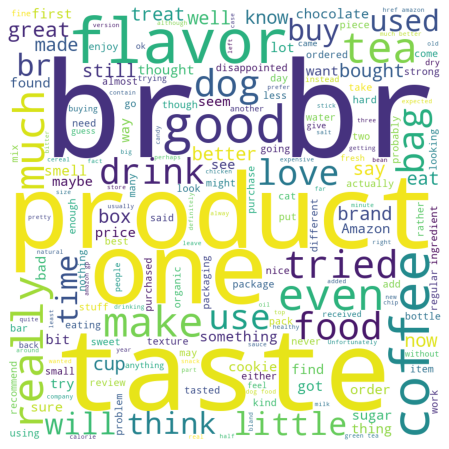

In [ ]:
wc2=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wc2.generate(''.join(df[df['Score']==2]['Text']))
plt.figure(figsize=(8,8))
plt.imshow(wc2)
plt.axis('off')
plt.show()


In [ ]:
df.Score.value_counts()

4    8117
5    8106
3    8103
2    8095
1    8079
Name: Score, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Score']=le.fit_transform(df['Score'])

In [ ]:
df.Score.value_counts()

3    8117
4    8106
2    8103
1    8095
0    8079
Name: Score, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.2,random_state=2)

In [ ]:
x_train=df_train['Text']
y_train=df_train['Score']
x_test=df_test['Text']
y_test=df_test['Score']

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sent_lens=[]
for sent in df_train['Text']:
    sent_lens.append(len(word_tokenize(sent)))
df_train['sent_len'] = sent_lens
df_train.head()   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Text,Score,sent_len
572,"If you don't love ginger (real ginger, not the...",3,72
17010,"Taste: OK, Calorie content: good, Protein co...",1,53
35365,"This tea brews very easily in my <a href=""http...",3,71
19002,Dog treats. What do you do with dog treats? We...,3,264
34155,"The tomato flavor is inferior, the taste is ex...",0,105


In [ ]:
max(sent_lens)

2173

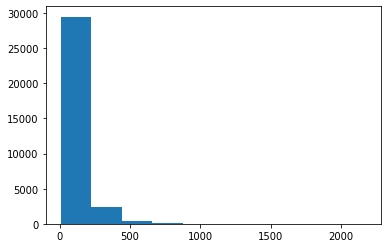

In [ ]:
plt.hist(sent_lens)
plt.show()

In [ ]:
np.quantile(sent_lens,0.95)

285.0

In [ ]:
#95% review is under  285 so we will take maximum length 285

In [ ]:
max_len=285

In [ ]:
# Tokenization
tok = Tokenizer(char_level=False,split=' ')

tok.fit_on_texts(x_train)

In [ ]:
tok.index_word

{1: 'the',
 2: 'i',
 3: 'a',
 4: 'and',
 5: 'to',
 6: 'it',
 7: 'of',
 8: 'is',
 9: 'br',
 10: 'this',
 11: 'in',
 12: 'for',
 13: 'that',
 14: 'but',
 15: 'not',
 16: 'my',
 17: 'was',
 18: 'with',
 19: 'have',
 20: 'you',
 21: 'are',
 22: 'they',
 23: 'like',
 24: 'as',
 25: 'on',
 26: 'so',
 27: 'these',
 28: 'be',
 29: 'taste',
 30: 'them',
 31: 'good',
 32: 'if',
 33: 'product',
 34: 'just',
 35: 'or',
 36: 'one',
 37: 'at',
 38: 'coffee',
 39: 'very',
 40: 'flavor',
 41: 'all',
 42: 'would',
 43: 'from',
 44: 'had',
 45: "it's",
 46: 'more',
 47: 'me',
 48: 'can',
 49: 'when',
 50: 'will',
 51: 'out',
 52: 'has',
 53: 'than',
 54: 'tea',
 55: 'no',
 56: 'other',
 57: 'food',
 58: 'great',
 59: 'get',
 60: 'we',
 61: 'really',
 62: 'up',
 63: "don't",
 64: 'some',
 65: 'much',
 66: 'were',
 67: 'about',
 68: 'too',
 69: 'only',
 70: 'there',
 71: 'because',
 72: 'an',
 73: 'what',
 74: 'amazon',
 75: 'which',
 76: 'do',
 77: 'your',
 78: 'love',
 79: 'little',
 80: 'buy',
 81: 'ev

In [ ]:
vocab_len=len(tok.index_word)

In [ ]:
vocab_len

36848

In [ ]:
sequences_train = tok.texts_to_sequences(x_train)

In [ ]:
sequences_train

[[32,
  20,
  63,
  78,
  311,
  271,
  311,
  15,
  1,
  3545,
  10194,
  7,
  311,
  11,
  311,
  2652,
  20,
  292,
  23,
  10,
  714,
  32,
  20,
  21,
  3,
  311,
  458,
  20,
  50,
  250,
  6,
  311,
  140,
  19,
  9506,
  2616,
  3107,
  11,
  781,
  6,
  8,
  2066,
  12,
  231,
  4665,
  43,
  5606,
  4252,
  4,
  4084,
  1013,
  313,
  3,
  91,
  12,
  1653,
  54,
  2340,
  4,
  311,
  2117],
 [29,
  370,
  672,
  674,
  31,
  366,
  674,
  446,
  100,
  3304,
  2,
  63,
  194,
  154,
  22,
  48,
  2980,
  1,
  430,
  7,
  27,
  347,
  2,
  17,
  643,
  132,
  935,
  6731,
  14,
  22,
  21,
  227,
  39,
  3595,
  2,
  292,
  80,
  27,
  98],
 [10,
  54,
  2253,
  39,
  574,
  11,
  16,
  3,
  416,
  407,
  404,
  74,
  315,
  411,
  33,
  21424,
  13895,
  21425,
  21426,
  102,
  122,
  102,
  3885,
  820,
  54,
  905,
  352,
  3,
  54,
  905,
  1,
  619,
  8,
  178,
  4,
  1,
  40,
  8,
  31,
  1,
  1729,
  290,
  16,
  242,
  40,
  7,
  54,
  14,
  261,
  34,
  16,
  1207,


In [ ]:
sequences_matrix_train = sequence.pad_sequences(sequences_train,maxlen=max_len)

In [ ]:
y_train

572      3
17010    1
35365    3
19002    3
34155    0
        ..
31019    0
30280    4
6637     3
35343    4
23720    3
Name: Score, Length: 32400, dtype: int64

In [ ]:
sequences_matrix_train

array([[   0,    0,    0, ...,    4,  311, 2117],
       [   0,    0,    0, ...,   80,   27,   98],
       [   0,    0,    0, ...,  629, 3420,   31],
       ...,
       [   0,    0,    0, ...,    2,  250,    6],
       [   0,    0,    0, ...,   16,  428,  503],
       [   0,    0,    0, ...,  113,  175,  716]], dtype=int32)

In [ ]:
sequences_matrix_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
sequences_matrix_test = sequence.pad_sequences(tok.texts_to_sequences(x_test),maxlen=max_len)

In [ ]:
sequences_matrix_test

array([[   0,    0,    0, ...,   22,   21, 1189],
       [   0,    0,    0, ..., 2121,   10,  295],
       [   0,    0,    0, ...,  173,    2,  250],
       ...,
       [   0,    0,    0, ...,   99,  313,    6],
       [   0,    0,    0, ...,    5, 7620,   30],
       [   0,    0,    0, ...,  561,    5,   47]], dtype=int32)

In [ ]:
#Sentiment Analysis by using Simple RNN

In [ ]:
#Simple RNN
model = Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
model.add(SimpleRNN(32,activation='tanh'))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 285, 500)          18424500  
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                17056     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 18,442,777
Trainable params: 18,442,777
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd')

In [ ]:
model.fit(sequences_matrix_train,y_train.values,batch_size=10,epochs=10)

Epoch 1/10
3240/3240 [==============================] - 285s 88ms/step - loss: 1.6155
Epoch 2/10
3240/3240 [==============================] - 276s 85ms/step - loss: 1.6047
Epoch 3/10
3240/3240 [==============================] - 269s 83ms/step - loss: 1.5865
Epoch 4/10
3240/3240 [==============================] - 272s 84ms/step - loss: 1.5322
Epoch 5/10
3240/3240 [==============================] - 271s 84ms/step - loss: 1.5025
Epoch 6/10
3240/3240 [==============================] - 270s 83ms/step - loss: 1.4791
Epoch 7/10
3240/3240 [==============================] - 267s 82ms/step - loss: 1.5499
Epoch 8/10
3240/3240 [==============================] - 275s 85ms/step - loss: 1.4716
Epoch 9/10
3240/3240 [==============================] - 270s 83ms/step - loss: 1.4675
Epoch 10/10
3240/3240 [==============================] - 271s 84ms/step - loss: 1.5802


In [ ]:
y_pred=model.predict(sequences_matrix_test)

In [ ]:
y_pred

array([[0.31464258, 0.2697484 , 0.19972178, 0.12509342, 0.09079387],
       [0.34575948, 0.2825186 , 0.18967228, 0.10601687, 0.07603269],
       [0.17638227, 0.18082257, 0.21461648, 0.2254204 , 0.20275831],
       ...,
       [0.19094515, 0.19080175, 0.21338932, 0.21673712, 0.18812667],
       [0.33048728, 0.27792615, 0.19854707, 0.11540513, 0.07763439],
       [0.3588256 , 0.28882974, 0.1886541 , 0.09826223, 0.06542836]],
      dtype=float32)

In [ ]:
y_pred=y_pred.argmax(axis=1)

In [ ]:
y_pred

array([0, 0, 3, ..., 3, 0, 0])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.23      0.95      0.37      1597
           1       0.00      0.00      0.00      1605
           2       0.20      0.06      0.10      1690
           3       0.27      0.08      0.13      1579
           4       0.61      0.18      0.28      1629

    accuracy                           0.25      8100
   macro avg       0.26      0.26      0.17      8100
weighted avg       0.26      0.25      0.17      8100



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
